In [4]:
import sys
import numpy as np
import math
import operator
import functools
import json
from pprint import pprint
%matplotlib widget
# import sympy
from mpl_toolkits.mplot3d import axes3d

In [293]:
allRotationMatrices = [
    np.identity(3),
    np.array([[-1,0,0], [0, -1, 0], [0,0,1]]),
    np.array([[-1,0,0], [0, 1, 0], [0,0,-1]]),
    np.array([[1,0,0], [0, -1, 0], [0,0,-1]]),
    
    np.array([[-1,0,0], [0, 0, 1], [0,1,0]]),
    np.array([[1,0,0], [0, 0, -1], [0,1,0]]),
    np.array([[1,0,0], [0, 0, 1], [0,-1,0]]),
    np.array([[-1,0,0], [0, 0, -1], [0,-1,0]]),
    
    np.array([[0,-1,0], [1, 0, 0], [0,0,1]]),
    np.array([[0,1,0], [-1, 0, 0], [0,0,1]]),
    np.array([[0,1,0], [1, 0, 0], [0,0,-1]]),
    np.array([[0,-1,0], [-1, 0, 0], [0,0,-1]]),
    
    np.array([[0,1,0], [0, 0, 1], [1,0,0]]),
    np.array([[0,-1,0], [0, 0, -1], [1,0,0]]),
    np.array([[0,-1,0], [0, 0, 1], [-1,0,0]]),
    np.array([[0,1,0], [0, 0, -1], [-1,0,0]]),
    
    np.array([[0,0,1], [1, 0, 0], [0,1,0]]),
    np.array([[0,0,-1], [-1, 0, 0], [0,1,0]]),
    np.array([[0,0,-1], [1, 0, 0], [0,-1,0]]),
    np.array([[0,0,1], [-1, 0, 0], [0,-1,0]]),
    
    np.array([[0,0,-1], [0, 1, 0], [1,0,0]]),
    np.array([[0,0,1], [0, -1, 0], [1,0,0]]),
    np.array([[0,0,1], [0, 1, 0], [-1,0,0]]),
    np.array([[0,0,-1], [0, -1, 0], [-1,0,0]]),
]

In [418]:
from scipy import linalg
import matplotlib.pyplot as plt
# %matplotlib widget

class Scanner:
    def __init__(self, id):
        self.id = id
        self.beacons = np.array([])
        self.position = np.array([0,0,0])
        self.direction = np.identity(3)
    
    def add_beacons(self, beacon_coords):
        self.beacons = np.array(beacon_coords)
        # self.beacons = np.c_[np.array(beacon_coords), np.ones(len(beacon_coords))]
    
    def dist_matrix_by_index(self, index):
        sq_dist = np.sum(np.square(self.beacons - self.beacons[index]), axis=1)
        return np.sqrt(sq_dist)
        
        
    def new_coords(self):
        return np.dot(self.t_matrix, self.coords_M)
    
    def graph(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter(self.beacons[:,0], self.beacons[:,1], self.beacons[:,2])
        plt.show()
        
    def overlap(self, other):
        # There are always 12 points that are overlapped
        for i in range(len(self.beacons)):
            dist_0 = self.dist_matrix_by_index(i)
            for j in range(len(other.beacons)):
                dist_1 = other.dist_matrix_by_index(j)
                inter = set(dist_0).intersection(dist_1)
                if len(inter) == 12:
                    # Found overlap
                    set_self = np.empty((0, len(self.beacons[0])))
                    set_other = np.empty((0, len(self.beacons[0])))
                    for dist in inter:
                        set_self = np.append(set_self, self.beacons[np.where(dist_0 == dist)], axis=0)
                        set_other = np.append(set_other, other.beacons[np.where(dist_1 == dist)], axis=0)
                    return set_self, set_other
        
    def __repr__(self):
        return f"Scanner:{self.id}"
    
def right(i):
    return np.pi/2 * i

def R_x(x):
    x = right(x)
    return np.array([[1,0,0], [0, np.cos(x), -np.sin(x)], [0, np.sin(x), np.cos(x)]])

def R_y(y):
    y = right(y)
    return np.array([[np.cos(y), 0, np.sin(y)], [0, 1, 0], [-np.sin(y), 0, np.cos(x)]])

def R_z(z):
    z = right(z)
    return np.array([[np.cos(z), -np.sin(z), 0], [np.sin(z), np.cos(x), 0], [0, 0, 1]])

def getTransformMatrix(set_1, set_2):
    for rot in allRotationMatrices:
        rot_2 = np.apply_along_axis(lambda x: x @ rot, 1, set_2)
        diff = rot_2 - set_1
        if len(np.where(diff == diff[0])[0]) == 12*3:
            # print(rot, diff)
            return rot, diff[0]
    
# M = np.c_[R_x(1), [10, 5, 1]]
# print(np.dot(M, [1,1,1, 1]))

In [425]:
def part1(arr):
    scanners = []
    beacon_coords = []
    for a in arr:
        if a.find("scanner") != -1:
            s = Scanner(int(a.strip("-").split()[1]))
        elif not a:
            s.add_beacons(beacon_coords)
            beacon_coords = []
            scanners.append(s)
        else:
            beacon_coords.append([int(i) for i in a.split(",")])
            
    # Find overlapping
    a, b = scanners[0].overlap(scanners[1])
    R, t = getTransformMatrix(a, b)
    pprint(a[0])
    pprint(b[0])
    print(R, t)
    # print(np.dot(R, a[0]))
    print((R @ a[0]) + t)
    print((R @ b[0]) - t)
    # print(np.dot(R, a[0]))
    # pprint(t)
    # pprint(np.dot(t,a.T).T)
    return

In [426]:
def part2(arr):
    return

In [427]:
if __name__ == "__main__":
    file = sys.argv[-1] if sys.argv[-1].endswith(".txt") else "sample.txt"
    with open(file, "r") as f:
        arr = f.read().splitlines()

        print(part1(arr))
        print(part2(arr))

array([ 404., -588., -901.])
array([-336.,  658.,  858.])
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]] [ -68. 1246.   43.]
[-472.  658.  944.]
[ 404. -588. -901.]
None
None


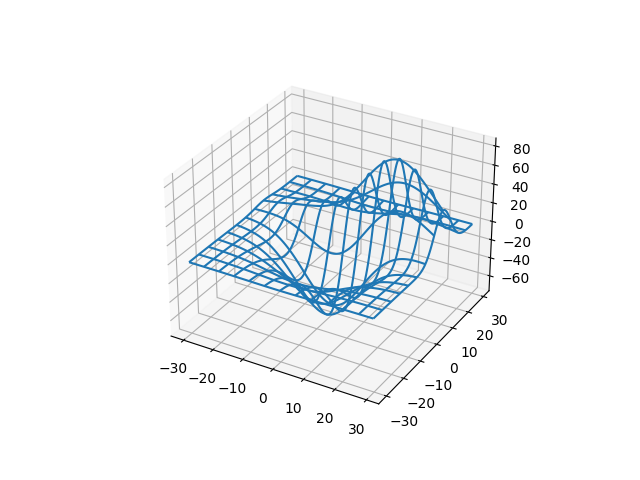

In [403]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()



In [162]:
a = np.array([0,1,2,3,4,5])
print(a)
print(np.roll(a, 2))
print(np.roll(a, 4))

[0 1 2 3 4 5]
[4 5 0 1 2 3]
[2 3 4 5 0 1]
